In [15]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the API key.
from config import weather_api_key
# Import the time module.
import time

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2afbc27f9442a8aebf208c1ccd7a97d2


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | khokhryaki
Processing Record 2 of Set 1 | ambilobe
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | vasyshcheve
Processing Record 5 of Set 1 | torbay
Processing Record 6 of Set 1 | buala
Processing Record 7 of Set 1 | alice springs
Processing Record 8 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | buchanan
Processing Record 11 of Set 1 | kailua
Processing Record 12 of Set 1 | cherskiy
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | souillac
Processing Record 15 of Set 1 | husavik
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | nikolskoye
Processing Record 19 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | nome
Processing Record 22 of Set 1 | yellowknife
Processing Record 23 of Set 1 | pontiac
Proces

Processing Record 37 of Set 4 | tasiilaq
Processing Record 38 of Set 4 | panshi
Processing Record 39 of Set 4 | caala
Processing Record 40 of Set 4 | odweyne
Processing Record 41 of Set 4 | healdsburg
Processing Record 42 of Set 4 | grand gaube
Processing Record 43 of Set 4 | padang
Processing Record 44 of Set 4 | toliary
City not found. Skipping...
Processing Record 45 of Set 4 | barra do garcas
Processing Record 46 of Set 4 | sorland
Processing Record 47 of Set 4 | ilulissat
Processing Record 48 of Set 4 | vienna
Processing Record 49 of Set 4 | conselheiro pena
Processing Record 50 of Set 4 | savigny-le-temple
Processing Record 1 of Set 5 | beyneu
Processing Record 2 of Set 5 | trairi
Processing Record 3 of Set 5 | ambunti
Processing Record 4 of Set 5 | mormugao
Processing Record 5 of Set 5 | srednekolymsk
Processing Record 6 of Set 5 | bharatpur
Processing Record 7 of Set 5 | ketchikan
Processing Record 8 of Set 5 | eyl
Processing Record 9 of Set 5 | porto velho
Processing Record 10

Processing Record 28 of Set 8 | sambava
Processing Record 29 of Set 8 | fukue
Processing Record 30 of Set 8 | whitehorse
Processing Record 31 of Set 8 | pontes e lacerda
Processing Record 32 of Set 8 | salalah
Processing Record 33 of Set 8 | agua prieta
Processing Record 34 of Set 8 | vanavara
Processing Record 35 of Set 8 | tokmak
Processing Record 36 of Set 8 | grimari
City not found. Skipping...
Processing Record 37 of Set 8 | glenwood springs
Processing Record 38 of Set 8 | tahta
Processing Record 39 of Set 8 | campestre
Processing Record 40 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 41 of Set 8 | alofi
Processing Record 42 of Set 8 | lasa
Processing Record 43 of Set 8 | marcona
City not found. Skipping...
Processing Record 44 of Set 8 | richards bay
Processing Record 45 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 46 of Set 8 | talnakh
Processing Record 47 of Set 8 | teterow
Processing Record 48 of Set 8 | shagonar
Processing Record 49 of Set 8 

Processing Record 14 of Set 12 | rio bueno
Processing Record 15 of Set 12 | notse
Processing Record 16 of Set 12 | jining
Processing Record 17 of Set 12 | oranjestad
Processing Record 18 of Set 12 | tazovskiy
Processing Record 19 of Set 12 | sumenep
Processing Record 20 of Set 12 | honningsvag
Processing Record 21 of Set 12 | port lincoln
Processing Record 22 of Set 12 | coahuayana
Processing Record 23 of Set 12 | ingham
Processing Record 24 of Set 12 | arco
Processing Record 25 of Set 12 | coihaique
Processing Record 26 of Set 12 | eydhafushi
Processing Record 27 of Set 12 | tanout
Processing Record 28 of Set 12 | mangai
Processing Record 29 of Set 12 | pochutla
Processing Record 30 of Set 12 | evensk
Processing Record 31 of Set 12 | buariki
City not found. Skipping...
Processing Record 32 of Set 12 | yeniseysk
Processing Record 33 of Set 12 | talaya
Processing Record 34 of Set 12 | grants
Processing Record 35 of Set 12 | wahran
City not found. Skipping...
Processing Record 36 of Set 

In [10]:
len(city_data)

556

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khokhryaki,56.9156,53.3221,28.00,93,100,3.00,RU,2021-01-30 19:47:48
1,Ambilobe,-13.2000,49.0500,74.25,93,3,2.01,MG,2021-01-30 19:47:48
2,Ushuaia,-54.8000,-68.3000,53.60,58,20,26.46,AR,2021-01-30 19:44:26
3,Vasyshcheve,49.8285,36.3269,37.40,100,90,11.18,UA,2021-01-30 19:47:49
4,Torbay,47.6666,-52.7314,30.00,86,90,16.11,CA,2021-01-30 19:43:46
5,Buala,-8.1450,159.5921,81.86,82,100,13.73,SB,2021-01-30 19:47:49
6,Alice Springs,-23.7000,133.8833,82.40,34,75,9.22,AU,2021-01-30 19:47:49
7,Busselton,-33.6500,115.3333,64.00,74,0,1.99,AU,2021-01-30 19:43:41
8,Buchanan,5.8808,-10.0467,80.60,83,75,5.61,LR,2021-01-30 19:47:50
9,Kailua,21.4022,-157.7394,75.20,64,40,16.11,US,2021-01-30 19:47:50


In [12]:
city_data_org_df = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[city_data_org_df]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Khokhryaki,RU,2021-01-30 19:47:48,56.9156,53.3221,28.00,93,100,3.00
1,Ambilobe,MG,2021-01-30 19:47:48,-13.2000,49.0500,74.25,93,3,2.01
2,Ushuaia,AR,2021-01-30 19:44:26,-54.8000,-68.3000,53.60,58,20,26.46
3,Vasyshcheve,UA,2021-01-30 19:47:49,49.8285,36.3269,37.40,100,90,11.18
4,Torbay,CA,2021-01-30 19:43:46,47.6666,-52.7314,30.00,86,90,16.11
5,Buala,SB,2021-01-30 19:47:49,-8.1450,159.5921,81.86,82,100,13.73
6,Alice Springs,AU,2021-01-30 19:47:49,-23.7000,133.8833,82.40,34,75,9.22
7,Busselton,AU,2021-01-30 19:43:41,-33.6500,115.3333,64.00,74,0,1.99
8,Buchanan,LR,2021-01-30 19:47:50,5.8808,-10.0467,80.60,83,75,5.61
9,Kailua,US,2021-01-30 19:47:50,21.4022,-157.7394,75.20,64,40,16.11


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

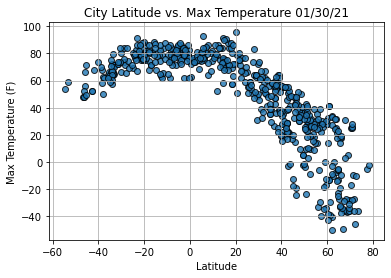

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

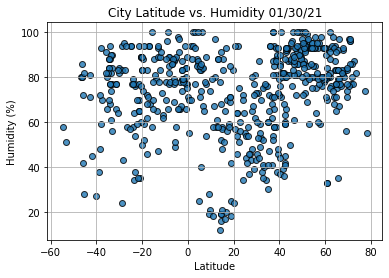

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

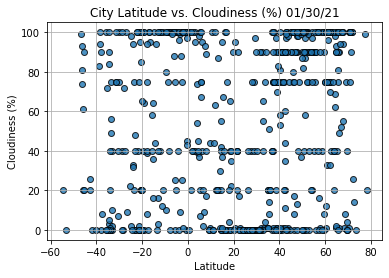

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

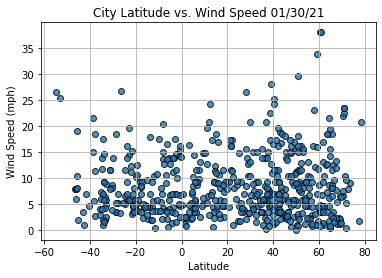

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()